Audio Processing Notebook



In [1]:
# !pip install pydub
from pydub import AudioSegment
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

# !pip install librosa
#for loading and visualizing audio files
import librosa
import librosa.display

#to play audio
# import IPython.display as ipd

/Users/bruno/Documents/PsyVox/voice-depression/venv/lib/python3.10/site-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [2]:
def transcript_times(patientId):
    # Store transcript file in a DataFrame
    transcripts = pd.read_table("../TRANSCRIPT/{}_TRANSCRIPT.csv".format(patientId))
    #We keep the rows corresponding to the participant (patient)
    patient_times = transcripts.loc[transcripts['speaker'] == 'Participant']
    #We drop the columns for speaker and value (words spoken) and we keep just start and end time of participant speech
    patient_times.drop(index = patient_times.loc[patient_times["value"] == 'scrubbed_entry'].index, inplace = True)
    patient_times.drop(['speaker','value'], axis = 1)
    return patient_times

def slice_audio_file(patientId, patient_times):
    input_audio_file = "../AUDIO/{}_AUDIO.wav".format(patientId)
    #Set the folder and name of file to export the sliced audio
    output_slice_folder = "audio_sliced/{}.wav".format(patientId) #300 stands for the participant number and -1 to the first slice
    #Store the data from the audio file
    sound = AudioSegment.from_file(input_audio_file, format="wav")
    sliced = AudioSegment.empty()
    #Set the start and end time for the interval to be cut
    #export the file from the start to the end (*1000 is to transform from seconds to milliseconds) to the selected folder for output (outout_slice_folder)
    for i in range(patient_times.shape[0]):
        start, end = patient_times.iloc[i]['start_time'], patient_times.iloc[i]['stop_time']
        sound2 = sound[start*1000:end*1000]
        sliced = sliced.append(sound2, crossfade=0)
    sliced.export(output_slice_folder, format="wav")
    return

In [3]:
for patientId in range(300, 493):
    if (patientId == 342 or patientId == 394 or patientId == 398 or patientId == 460):
        print("no patient")
    else:
        patient_times = transcript_times(patientId)
        slice_audio_file(patientId, patient_times)


<ipython-input-2-c99c587f4a0e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patient_times.drop(index = patient_times.loc[patient_times["value"] == 'scrubbed_entry'].index, inplace = True)


In [4]:
audio_fpath = 'audio_sliced/'
audio_clips = os.listdir(audio_fpath)
print("No. of .wav files in audio folder = ",len(audio_clips))

No. of .wav files in audio folder =  2


<class 'numpy.ndarray'> <class 'int'>
(19989117,) 44100


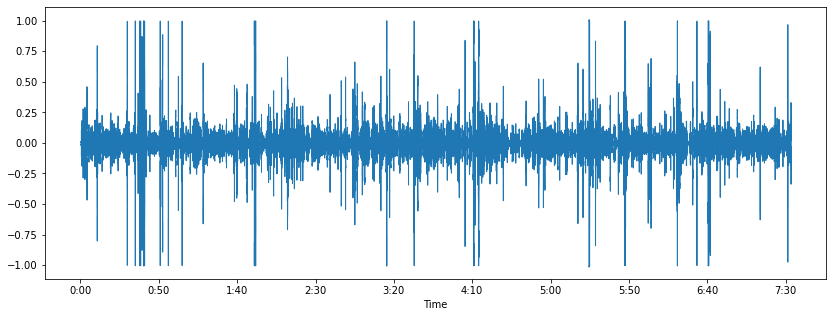

In [5]:
x, sr = librosa.load(audio_fpath+audio_clips[0], sr=44100)

print(type(x), type(sr))
print(x.shape, sr)
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)

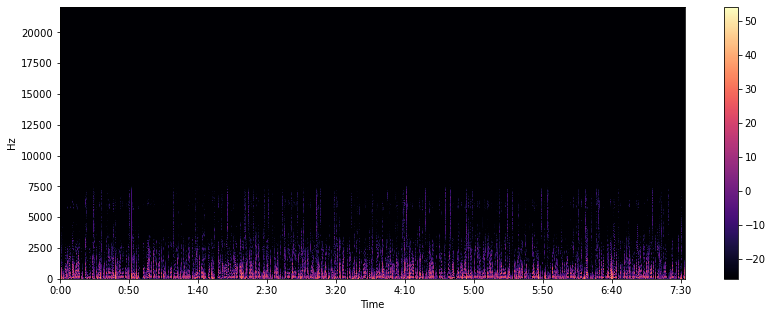

In [6]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

(-0.005804988662131519, 453.27092970521545, -10.7666015625, 22060.7666015625)

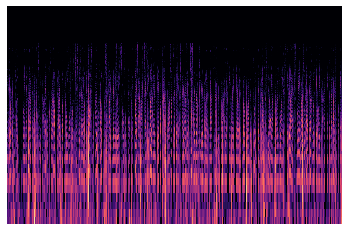

In [7]:
# plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
# plt.colorbar()
plt.axis('off')

In [10]:
def slice_audio_file_10s(patientId):
    input_audio_file = "audio_sliced/{}.wav".format(patientId)
    #Set the folder and name of file to export the sliced audio
    output_slice_folder = "audio_sliced/10s/{}.wav".format(patientId) #300 stands for the participant number and -1 to the first slice
    #Store the data from the audio file
    sound = AudioSegment.from_file(input_audio_file, format="wav")
    for i, chunk in enumerate(sound[::10000]):
        with open("audio_sliced/10s/{}-{}.wav".format(patientId,i), "wb") as f:
            chunk.export(f, format="wav")
    return

for patientId in range(300, 493):
    if (patientId == 342 or patientId == 394 or patientId == 398 or patientId == 460):
        print("no patient")
    else:
        slice_audio_file_10s(patientId)



no patient
no patient
no patient
no patient


In [20]:
for file in os.listdir('audio_sliced/10s/'):
    sound = AudioSegment.from_file("audio_sliced/10s/{}".format(file))
    if sound.duration_seconds < 10.0:
        os.remove("audio_sliced/10s/{}".format(file))



In [21]:
for file in os.listdir('audio_sliced/10s/'):
    sound = AudioSegment.from_file("audio_sliced/10s/{}".format(file))
    print(sound.duration_seconds)

10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
